## This notebook was made too predict sotck prices with traditional machine learning algorithms and deep learning

### To run this notebook ensure that you have already the dataset provided by kaggle -> daily-historical-stock-prices-1970-2018

> ensure thatyou have the folder : 
1. /kaggle/input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv
2. /kaggle/input/daily-historical-stock-prices-1970-2018/historical_stocks.csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #ploting graphics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv
/kaggle/input/daily-historical-stock-prices-1970-2018/historical_stocks.csv


Starting by visualizing data;

In [2]:
missing_values = ["n/a", "na", "--"]

#stock_prices = pd.read_csv('../input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv')
stocks = pd.read_csv('../input/daily-historical-stock-prices-1970-2018/historical_stocks.csv',na_values = missing_values)

Let's start with a small preview of the corresponding dataframe read previously;

In [3]:
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [4]:
stocks.columns

Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')

We realize there are 5 columns:
- 'ticker' corresponds to the name of the share
- 'exchange' corresponds to the type of exchange made 
- 'name' refers the company's name
- 'sector' refers to the actual sector where the given company operates
- 'industry' specifies the type of services that can be provided

In [5]:
stocks.shape

(6460, 5)

In [6]:
stocks['ticker'].unique().size

6460

> We realize there are 6460 entries to the table, where the unique identifiers are the share's names, meaning that a company's name can show up twice if it has, throughout the established period of time, changed the name of it's stocks. We will note that, for having to change the type of exchange, the companies also changed the name of the shares;

> One example of this is:

In [7]:
stocks[stocks['name'] == "1347 PROPERTY INSURANCE HOLDINGS, INC."]

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS


> The dataset presents missing values on columns 'sector' and 'industry'

## Missing values treatment

#### The first step is to identify if the companies switched their share name; in the case they did, they can then contain the sector and industry present on another row

> Right now we have the following missing values:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1440
5. industry    1440

> In a 6459 rows × 5 columns matrix


> We want all rows that present null values, so we can obtain the names of the companies that do.

In [8]:
null_data = stocks[stocks.isnull().any(axis=1)]
null_data

,ticker,exchange,name,sector,industry
19,ABP,NASDAQ,ABPRO CORPORATION,NaN,NaN
42,SQZZ,NASDAQ,ACTIVE ALTS CONTRARIAN ETF,NaN,NaN
62,ACT,NASDAQ,ADVISORSHARES VICE ETF,NaN,NaN
100,ABDC,NASDAQ,ALCENTRA CAPITAL CORP.,NaN,NaN
124,SMCP,NASDAQ,ALPHAMARK ACTIVELY MANAGED SMALL CAP ETF,NaN,NaN
...,...,...,...,...,...
6393,WIA,NYSE,WESTERN ASSET/CLAYMORE U.S. TREASURY INFLATION...,NaN,NaN
6431,XFLT,NYSE,XAI OCTAGON FLOATING RATE & ALTERNATIVE INCOME...,NaN,NaN
6451,ZB^A,NYSE,ZIONS BANCORPORATION,NaN,NaN
6452,ZB^G,NYSE,ZIONS BANCORPORATION,NaN,NaN


> We realize that, by standard, all rows that do not have sector, do not have industry either and vice-versa.

### This function checks for companies that changed their ticker name

> If any did, we check if there are some other instances of that same company where the sector and industry information is present.

In [9]:
pd.options.mode.chained_assignment = None
names = null_data['name'].unique()

for companie in names:
    
    data = stocks[stocks['name'] == companie]
    
    for index,row in data.iterrows():
        
        if(not pd.isnull(row['sector'])):
            
            sector = row['sector']
            industry = row['industry']
            
            tmp = stocks[stocks['name'] == row['name']]
            tmp["sector"] = tmp["sector"].fillna(sector)
            tmp['industry'] = tmp['industry'].fillna(industry)
            stocks[stocks['name'] == row['name']] = tmp


In [10]:
stocks.isnull().sum()

ticker         0
exchange       0
name           0
sector      1018
industry    1018
dtype: int64

> After this operation, we remain with a 6459 rows × 5 columns matrix, but we have different numbers of missing values, respectively:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1018
5. industry    1018
6. dtype: int64

### In this part, all remaining missing values will be removed from the dataset, mainly for the reason that there is not sufficient information that allows us to fill these values, given the variety of sector and industries existant.
> We now have a 5442 rows × 5 columns matrix

In [11]:
stocks = stocks.dropna(how='any',axis=0) 
stocks.isnull().sum()

ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64

# Dataset exploration

> Predominant sectors

> Predominant industries

> Types of stock exchanges on which we operate

In [12]:
stocks['name'].unique().size

4551

In [13]:
stocks['exchange'].value_counts()

NASDAQ    2855
NYSE      2587
Name: exchange, dtype: int64

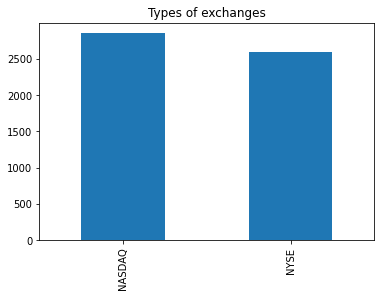

In [14]:
stocks['exchange'].value_counts().plot(kind='bar', title='Types of exchanges')

The number of shares in each type of exchange is rather balanced, which is good for the purpose of ML.

In [15]:
stocks['sector'].value_counts()

FINANCE                  1222
CONSUMER SERVICES         959
HEALTH CARE               784
TECHNOLOGY                609
CAPITAL GOODS             356
ENERGY                    295
PUBLIC UTILITIES          287
BASIC INDUSTRIES          276
CONSUMER NON-DURABLES     226
CONSUMER DURABLES         147
MISCELLANEOUS             142
TRANSPORTATION            138
SECTOR                      1
Name: sector, dtype: int64

In [16]:
stocks = stocks[stocks['sector'] != 'SECTOR']
stocks.shape
#remover a linha dummy

(5441, 5)

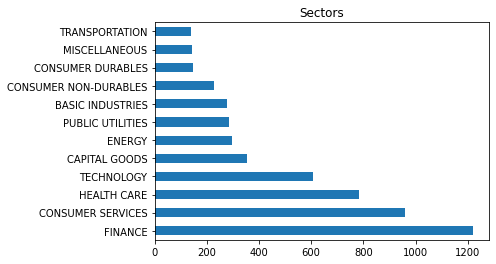

In [17]:
stocks['sector'].value_counts().plot(kind='barh', title='Sectors')

We realize the, throughout the dataset, the Finances sector dominates the sector column, up there with Consumer services and Health care. We can also consider technology, if we allow such leverage.

Text(0, 0.5, '')

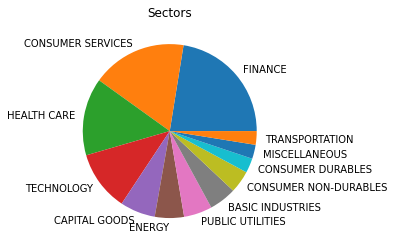

In [29]:
ax=stocks['sector'].value_counts().plot(kind='pie', title='Sectors', )
ax.set_ylabel('')

##  Industry

In [19]:
stocks['industry'].value_counts()

MAJOR BANKS                                        444
MAJOR PHARMACEUTICALS                              419
REAL ESTATE INVESTMENT TRUSTS                      377
BUSINESS SERVICES                                  248
OIL & GAS PRODUCTION                               162
                                                  ... 
PRECISION INSTRUMENTS                                1
DIVERSIFIED ELECTRONIC PRODUCTS                      1
CONSUMER: GREETING CARDS                             1
TOOLS/HARDWARE                                       1
GENERAL BLDG CONTRACTORS - NONRESIDENTIAL BLDGS      1
Name: industry, Length: 135, dtype: int64

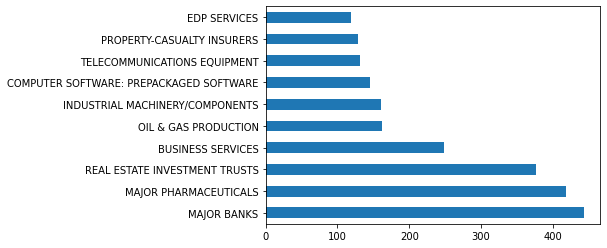

In [20]:
absolute_frequency_top10 = stocks['industry'].value_counts()[:10].copy()
absolute_frequency_top10 = absolute_frequency_top10.rename('')
absolute_frequency_top10.plot(kind='barh')

We can observe two major industries ruling the dataset by a considerable margin: Major Pharmaceuticals and Major Banks.

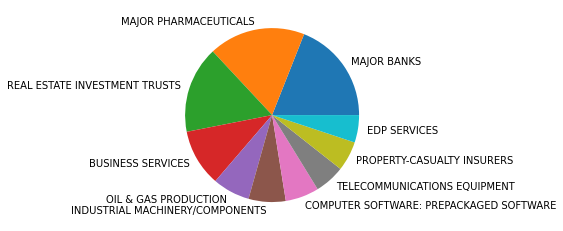

In [21]:
absolute_frequency_top10.plot(kind='pie')

Let's dive down on the rate of changing in terms of share name.

In [22]:
dif_exchange_x_ticker_exchange = stocks.groupby(['name','sector','industry'])['ticker'].agg(ticker_exchange=('ticker','count'), exchange=('exchange','count'))
dif_exchange_x_ticker= stocks.groupby(['name','sector','industry'])['ticker'].agg(ticker_exchange=('ticker','count'))
change_on = dif_exchange_x_ticker[dif_exchange_x_ticker['ticker_exchange'] >=2].sort_values(by='ticker_exchange', ascending=False).apply(lambda x : x-1)
change_off = dif_exchange_x_ticker[dif_exchange_x_ticker['ticker_exchange'] < 2].apply(lambda x : x-1)

In [23]:
dif_exchange_x_ticker_exchange

,,,ticker_exchange,exchange
name,sector,industry,,
"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES,1,1
"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS,2,2
180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES,1,1
1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS,1,1
1ST SOURCE CORPORATION,FINANCE,MAJOR BANKS,1,1
...,...,...,...,...
ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES,1,1
"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,1,1
ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS,1,1


In [24]:
dif_exchange_x_ticker_exchange[dif_exchange_x_ticker_exchange['exchange'] == dif_exchange_x_ticker_exchange['ticker_exchange']].count()

ticker_exchange    4554
exchange           4554
dtype: int64

By the operation above, we see that the number of ticker names and types of exchange are the same, which tells us, by knowing that there are not equal tickers in the dataset, that change to/from either type of exchange requires rebranding of the share, so we can simply identify it by the ticker, like we did priviously. We may also consider that the ticker name might be changed for marketing purposes and maintaining it's type of exchange.

It is worth noting that we will not include the type of exchange as we consider that it doesn't add information: **for now**,we do not have dates of these changes nor the info regarding if the shares still exist or not, so we cannot identify if there's some sort of shitf in favor of any of the types of exchange. So we won't be using type of exchange on the rest of this topic.

In [25]:
change_off

,,,ticker_exchange
name,sector,industry,
"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES,0
180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES,0
1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS,0
1ST SOURCE CORPORATION,FINANCE,MAJOR BANKS,0
"21VIANET GROUP, INC.",TECHNOLOGY,"COMPUTER SOFTWARE: PROGRAMMING, DATA PROCESSING",0
...,...,...,...
ZUMIEZ INC.,CONSUMER SERVICES,CLOTHING/SHOE/ACCESSORY STORES,0
"ZUORA, INC.",TECHNOLOGY,COMPUTER SOFTWARE: PREPACKAGED SOFTWARE,0
ZYMEWORKS INC.,HEALTH CARE,MAJOR PHARMACEUTICALS,0


In [26]:
change_on

,,,ticker_exchange
name,sector,industry,
BANK OF AMERICA CORPORATION,FINANCE,MAJOR BANKS,15
WELLS FARGO & COMPANY,FINANCE,MAJOR BANKS,14
PUBLIC STORAGE,CONSUMER SERVICES,REAL ESTATE INVESTMENT TRUSTS,13
BARCLAYS PLC,FINANCE,COMMERCIAL BANKS,12
CREDIT SUISSE AG,FINANCE,INVESTMENT BANKERS/BROKERS/SERVICE,11
...,...,...,...
BANK OF NEW YORK MELLON CORPORATION (THE),FINANCE,MAJOR BANKS,1
HOVNANIAN ENTERPRISES INC,CAPITAL GOODS,HOMEBUILDING,1
"HOSTESS BRANDS, INC.",CONSUMER NON-DURABLES,PACKAGED FOODS,1


We produced two distinct dataframes, grouped by the companies' names, names, sectors and industries,respectively, and contemplate the number of changes on ticker:
> The first one regards to the companies that did not make any changes, going by the name 'change_off'

> The second one regards to the companies that made name changes in the past, going by the name 'change_on'


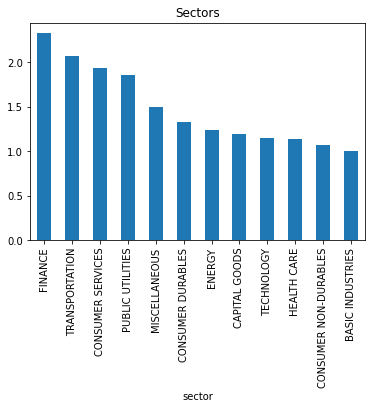

In [37]:
ax=change_on.groupby('sector').mean().sort_values(by='ticker_exchange',ascending=False).plot(kind='barh',y='ticker_exchange',legend=False, title ='Sectors')
#ax.set_ylabel('')

We identify that companies on the Finances sector show a mean higher regarding the rebranding of their tickers, followed closely by Transportation and Consumer Services

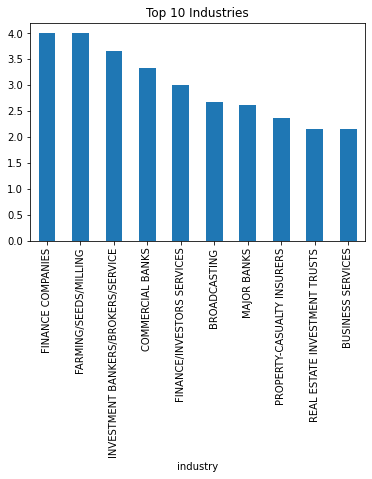

In [39]:
ax=change_on.groupby('industry').mean().sort_values(by='ticker_exchange',ascending=False)[:10].plot(kind='barh',y='ticker_exchange',legend=False, title ='Top 10 Industries')
#ax.set_ylabel('')

Industry wise, we can see that Finances show up big again, equal with Farming/Seeds/Milling. Investment Bankers/Brokers/Service follow right away.

We conclude the the shallow analysis of the first component of the Stock Prices dataset.